In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Preparing a val data data set

In [16]:
PATH='data/ieecamera/'
train_path = f'{PATH}train/'
train_files = !find {train_path} | grep -i "jpg"

In [10]:
os.mkdir(f'{PATH}valid')
val_path=f'{PATH}valid/'

In [8]:
classes = !ls {train_path}

In [11]:
for i in classes: os.mkdir(f'{val_path}{i}')

In [17]:
train_files = np.array(train_files)

In [20]:
np.random.shuffle(train_file)
val_img_number = len(train_files)*0.2

In [23]:
val_data = train_file[:int(val_img_number)]

In [25]:
val_data_destination = [x.replace('train', 'valid') for x in val_data]

In [29]:
import shutil
for src, dst in zip(val_data, val_data_destination):
     shutil.move(src, dst)

## model

In [3]:
PATH='data/ieecamera/'
sz=128
arch=resnet50
bs=32

In [8]:
!rm -rf tmp

In [4]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute="True", ps=0.5)

100%|██████████| 18/18 [00:13<00:00,  1.33it/s]


In [12]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 51%|█████     | 35/69 [00:00<00:00, 72.03it/s, loss=14.2]


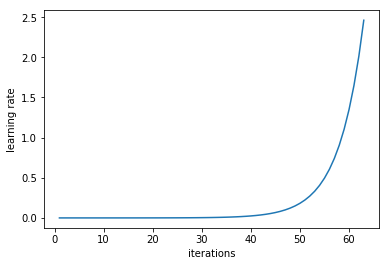

In [13]:
learn.sched.plot_lr()

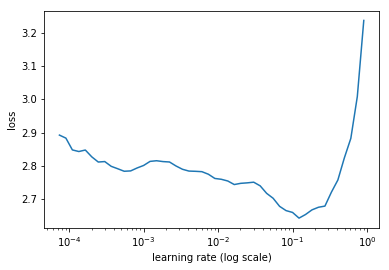

In [14]:
learn.sched.plot()

In [5]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       2.13231  1.66946  0.43808]                      



In [6]:
learn.precompute=False
learn.fit(1e-2, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       2.02794  1.65424  0.42593]                     
[ 1.       1.91279  1.71203  0.41204]                     



In [7]:
learn.unfreeze()
lrs = [1e-2/9,1e-2/3, 1e-2]
learn.fit(lrs, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       1.74083  1.58435  0.45255]                     
[ 1.       1.43089  1.29666  0.52083]                     
[ 2.       1.17342  1.18126  0.57755]                     



## model started to overfit increase the data size


In [15]:
lrs = np.array([1e-2/9,1e-2/3, 1e-2])
lr = 1e-2
def get_data(sz):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms)
    

In [13]:
sz=224

In [14]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.86409  0.99908  0.66898]                      
[ 1.       0.84654  0.95117  0.66782]                      
[ 2.       0.76851  0.95649  0.67535]                      



In [16]:
learn.unfreeze()
learn.fit(lrs,2, cycle_len=1, cycle_mult=2)
learn.save(f'resnet_{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.82781  0.83332  0.69965]                      
[ 1.       0.69094  0.99616  0.68981]                      
[ 2.       0.51746  0.62268  0.78704]                      



In [17]:
sz=350

In [18]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.36665  0.54118  0.8316 ]                      
[ 1.       0.36175  0.5385   0.82234]                      
[ 2.       0.31705  0.53932  0.83681]                      



In [19]:
learn.unfreeze()
learn.fit(lrs,1, cycle_len=1)


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.41678  0.52208  0.84722]                      



In [20]:
learn.save(f'resnet_{sz}')

In [28]:
learn.load(f'resnet_350')

In [29]:
bs=16
sz=512
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)



HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  3%|▎         | 4/138 [00:07<04:12,  1.88s/it, loss=0.531]

Exception in thread Thread-42:
Traceback (most recent call last):
  File "/home/irshad/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/irshad/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/irshad/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.38059  0.42856  0.86429]                        
[ 1.       0.38676  0.49082  0.85357]                        
[ 2.      0.2887  0.4562  0.8625]                            



In [32]:
learn.unfreeze()
learn.fit(lrs,1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.50506  0.34336  0.90179]                        



In [33]:
learn.save(f'resnet_512_1')

In [34]:
learn.fit(lrs, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.52466  0.36002  0.88571]                        
[ 1.       0.34176  0.33477  0.90357]                        



In [35]:
learn.fit(lrs, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.53972  0.55592  0.84643]                        
[ 1.       0.28685  0.29025  0.90893]                        



In [49]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
data=ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, test_name='test')

In [50]:
learn.set_data(data)

In [51]:
log_probs=learn.predict()

In [55]:
probs = np.exp(log_probs)

In [56]:
preds = np.argmax(probs,axis=1)

In [45]:
cm =confusion_matrix(y, preds)

In [57]:
(preds==y).sum()/len(preds)

0.90727272727272723

In [67]:
log_probs1, y = learn.TTA()

In [68]:
probs1 = np.mean(np.exp(log_probs1), axis=0)

In [69]:
preds1 = np.argmax(probs1,axis=1)

In [71]:
(preds1==y).sum()/len(preds1)

0.94363636363636361

## Test Prediction

In [72]:
test_log_probs,_ = learn.TTA(is_test=True)

In [73]:
test_probs = np.mean(np.exp(test_log_probs), axis=0)
test_preds = np.argmax(test_probs,axis=1)
test_fnames = data.test_ds.fnames
test_fnames = [x.replace(r'test/', '') for x in test_fnames]
test_camera = [data.classes[i] for i in test_preds]
final_sumbit_arr = np.stack((test_fnames,test_camera), axis=1 )
np.savetxt(f'{PATH}submit.csv', final_sumbit_arr, fmt='%s,%s', header='fname,camera',comments="")

In [90]:
f'{PATH}submit.csv'

'data/ieecamera/submit.csv'

512

In [77]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

In [78]:
idx = most_by_correct(0, False)

most incorrect cats
Most incorrect dogs


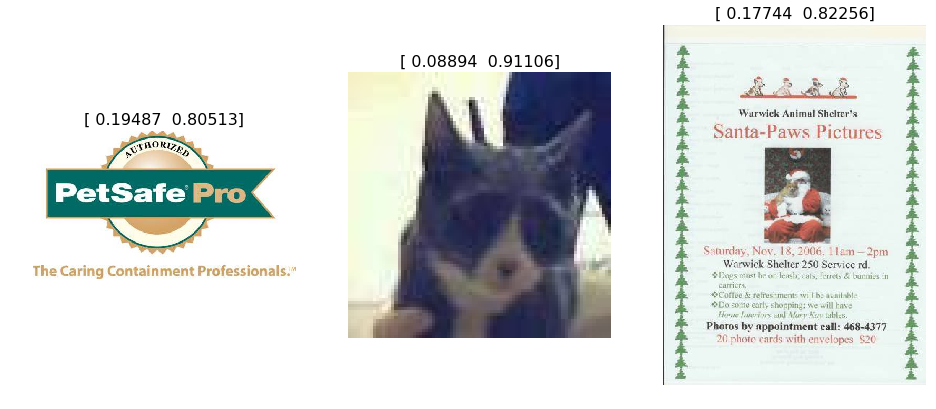

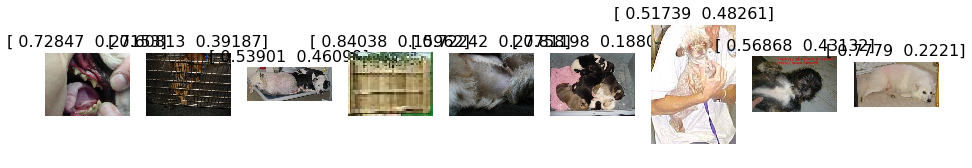

In [79]:
#most_incorrect_cats
incorrect_cats = np.where((y!=preds) & (y==0))[0]
plot_val_with_title(incorrect_cats, "most incorrect cats")
incorrect_dogs =  np.where((y!=preds) & (y==1))[0]
plot_val_with_title(incorrect_dogs, "Most incorrect dogs")

## submitting the points

(array([ 6171.,    36.,    17.,    21.,    12.,    18.,    24.,    31.,    67.,  6103.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

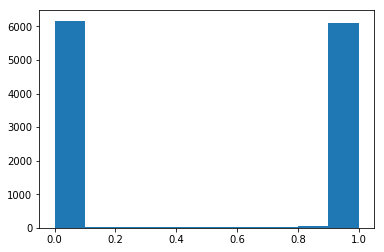

In [80]:
log_prob_test , _=learn.TTA(is_test=True)
test_probs = np.exp(log_prob_test)
mean_test_probs = np.mean(test_probs, axis=0)
is_dog = mean_test_probs[:,1]
plt.hist(is_dog)

In [81]:
file_names = data.test_ds.fnames


In [82]:
file_names = [x[6:x.find('.')] for x in file_names]
#print(file_names)
file_names = np.int32(file_names)
is_dog_clipped = np.clip(is_dog, 0.02, 0.98)
np.savetxt('submit.csv', np.stack((file_names, is_dog_clipped), axis=1), fmt="%d,%.5f", header='id,label', comments='') 

In [59]:
!pwd

/home/irshad/fastai/courses/dl1
